# SVD for Image Compression 

In [1]:
import numpy as np
from numpy.linalg import svd

from skimage.io import imread
import matplotlib.pyplot as plt

# Black and white image

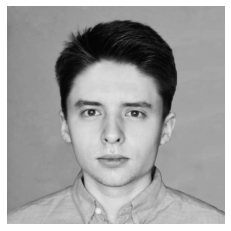

In [2]:
# Import the image
pic_dat = imread('pic.jpg', as_gray=True)

# Image size
x, y = pic_dat.shape

plt.imshow(pic_dat, cmap="gray")
plt.axis('off')
plt.show()

In [3]:
# SVD decomposition
U, s, V = svd(pic_dat, full_matrices=False)

print('Total singular values: {}.'.format(len(s)))

Total singular values: 640.


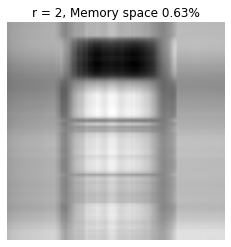

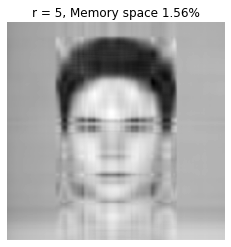

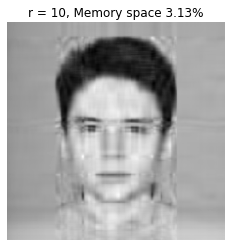

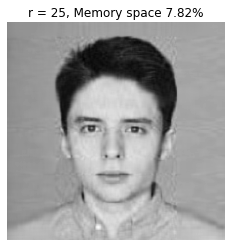

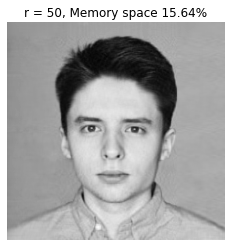

In [4]:
for r in 2, 5, 10, 25, 50:
    # r is the number of singular values used

    # Restoring the image
    pic_reduce = U[:, :r] @ np.diag(s[:r]) @ V[:r, :]

    plt.imshow(pic_reduce, cmap="gray")
    plt.axis('off')
    plt.title('r = ' + str(r) +
              ', Memory space {:.2%}'.format((x + y + 1) * r / (x * y)))
    plt.show()

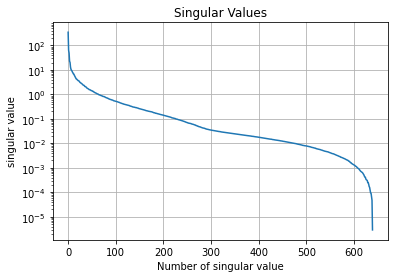

In [5]:
fig, ax = plt.subplots()

ax.semilogy(s)
ax.grid()
plt.title('Singular Values')
ax.set_xlabel('Number of singular value')
ax.set_ylabel('singular value')

plt.show()

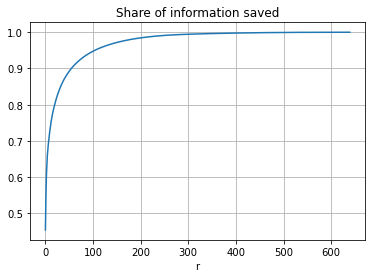

In [6]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(s) / np.sum(s))
ax.grid()
plt.title('Share of information saved')
ax.set_xlabel('r')

plt.show()

# Color image

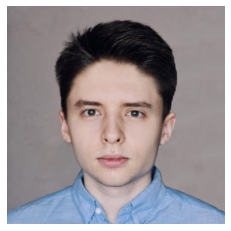

In [7]:
# Import the image
pic_rgb = imread('pic.jpg')

plt.imshow(pic_rgb)
plt.axis('off')
plt.show()

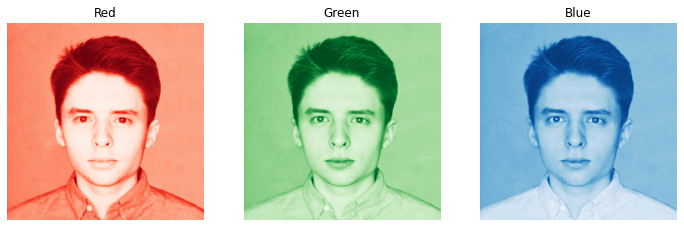

In [8]:
# Split the picture into Red, Green and Blue
pic_r = pic_rgb[:, :, 0]
pic_g = pic_rgb[:, :, 1]
pic_b = pic_rgb[:, :, 2]

# Picture the data obtained
fig, axes = plt.subplots(1, 3)

axes[0].imshow(pic_r, cmap="Reds_r")
axes[0].axis('off')
axes[0].set_title('Red')

axes[1].imshow(pic_g, cmap="Greens_r")
axes[1].axis('off')
axes[1].set_title('Green')

axes[2].imshow(pic_b, cmap="Blues_r")
axes[2].axis('off')
axes[2].set_title('Blue')

fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

In [9]:
# SVD decomposition for Red, Green and Blue
U_r, s_r, VT_r = svd(pic_r, full_matrices=False)
U_g, s_g, VT_g = svd(pic_g, full_matrices=False)
U_b, s_b, VT_b = svd(pic_b, full_matrices=False)

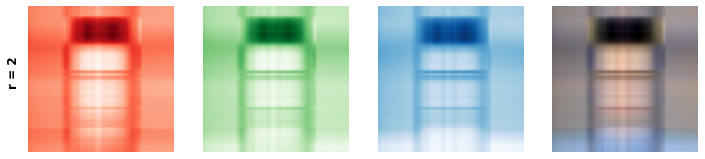

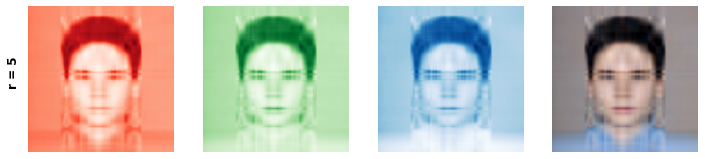

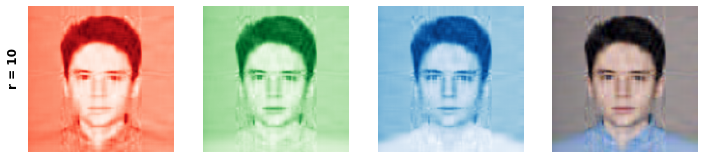

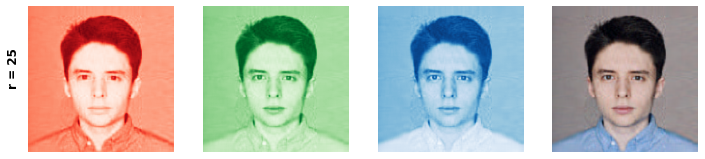

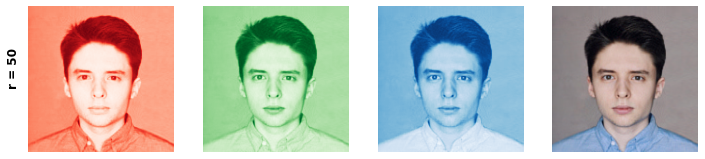

In [10]:
for r in 2, 5, 10, 25, 50:
    # r is the number of singular values used

    # Restoring the image
    pic_reduce_r = U_r[:, :r] @ np.diag(s_r[:r]) @ VT_r[:r, :]
    pic_reduce_g = U_g[:, :r] @ np.diag(s_g[:r]) @ VT_g[:r, :]
    pic_reduce_b = U_b[:, :r] @ np.diag(s_b[:r]) @ VT_b[:r, :]

    fig, axes = plt.subplots(1, 4)

    axes[0].imshow(pic_reduce_r, cmap="Reds_r")
    axes[0].axis('off')
    axes[0].set_title('r = ' + str(r), rotation="vertical",
                      position=(-.1, .42), fontweight='bold')

    axes[1].imshow(pic_reduce_g, cmap="Greens_r")
    axes[1].axis('off')

    axes[2].imshow(pic_reduce_b, cmap="Blues_r")
    axes[2].axis('off')

    pic_reduce_rgb = np.stack(
        [pic_reduce_r, pic_reduce_g, pic_reduce_b], axis=2)
    # Crop values to the range [0, 255]
    pic_reduce_rgb[pic_reduce_rgb < 0.] = 0
    pic_reduce_rgb[pic_reduce_rgb > 255.] = 255

    axes[3].imshow(pic_reduce_rgb.astype('uint8'))
    axes[3].axis('off')

    fig.set_figwidth(12)
    fig.set_figheight(6)

    plt.show()

### Create GIF

In [11]:
filenames = []
for r in np.arange(50, 0, -1):
    # r is the number of singular values used

    # Restoring the image
    pic_reduce_r = U_r[:, :r] @ np.diag(s_r[:r]) @ VT_r[:r, :]
    pic_reduce_g = U_g[:, :r] @ np.diag(s_g[:r]) @ VT_g[:r, :]
    pic_reduce_b = U_b[:, :r] @ np.diag(s_b[:r]) @ VT_b[:r, :]

    pic_reduce_rgb = np.stack(
        [pic_reduce_r, pic_reduce_g, pic_reduce_b], axis=2)
    # Crop values to the range [0, 255]
    pic_reduce_rgb[pic_reduce_rgb < 0.] = 0
    pic_reduce_rgb[pic_reduce_rgb > 255.] = 255

    plt.imshow(pic_reduce_rgb.astype('uint8'))
    plt.axis('off')
    plt.savefig(str(r) + '.png')

    name = f'{r}.png'
    filenames.append(name)

    # save frame
    plt.savefig(name)
    plt.close()

In [12]:
import os
import imageio

# build gif
with imageio.get_writer('SVD.gif', mode='I') as writer:
    for name in filenames:
        image = imageio.imread(name)
        writer.append_data(image)

# Remove files
for name in set(filenames):
    os.remove(name)